## Learning Objectives

Today we apply bootstrapping to a real dataset, being very careful to elaborate on the assumptions we make in order to do so.

## A quick look at the assumptions

Even though this is the practical version of the course, we should still be aware of the assumptions that allow us to take the actions below:

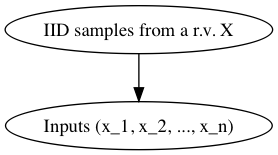

In [1]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('IID samples from a r.v. X')
G.add_node('Inputs (x_1, x_2, ..., x_n)')
G.add_edge('IID samples from a r.v. X', 'Inputs (x_1, x_2, ..., x_n)')
draw(G)

So if we can be reasonably convinced that we got our data IID from a random variable, then we can go ahead and do the below. Again just as a quick admonition, if there are black swans in your data you cannot be sure that the below tools will work, but with this assumption let's go on:

## The age of billionaires

Let's say that you were interested in the age of billionaires (maybe you wanted to make a special billionaire insurance contract). And while you were interested to know what the population of billionaires was in 2014, you know that the billionaire dataset is only a sample of the billionaires out there and you are interested in what that distribution will be like in the future. How would you figure out what the median age of billionaires is in the current population?

You could survey the population of the current billionaires, but that might be time consuming and expensive, so you choose to bootstrap.

The first step in bootstrapping is to identify your sample:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/billionaires.csv')

del df['was founder']
del df['inherited']
del df['from emerging']

df.age.replace(-1, np.NaN, inplace=True)
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

In [13]:
df2014 = df[df.year == 2014]

age_sample = df2014.age.dropna()

age_sample.describe()

count    1590.000000
mean       63.342138
std        13.137743
min        24.000000
25%        53.000000
50%        63.000000
75%        73.000000
max        98.000000
Name: age, dtype: float64

So our age sample will be all non-null ages from billionaires sampled in 2014. We have 1590 ages with the median around 63. Can we stop here?

Not quite, while this median is a good estimate of the median of the population now (as long as we assume the median is stationary), we are curious how confident we are in this estimate. To figure that out we need to look at the distribution of possible sample medians we might get. But wait, to get that distribution, we would need to be able to take multiple samples from the population distribution!

This is where the bootstrapping assumption comes in. We assume that the original sample is a good approximation of population distribution as long as we sample with replacement. 

That is the big assumption! As our original sample gets bigger and bigger, this becomes less of an assumption. 

The next step that we need to do is to get a lot of sample medians from from our 'population distribution' in order to view the distribution of possible samples medians. Remember that in order to view the distribution of a random variable we need to take infinite samples, so this is the second assumption:

In [17]:
# generally taking 10k bootstrap samples is good enough
num_bootsrap_samples = 10 * 1000

# notice that we sample age_sample.count() examples from our 'population'
bootsrap_samples = np.random.choice(age_sample, size=(age_sample.count(), num_bootsrap_samples))

bootsrap_sample_medians = np.median(bootsrap_samples, 0)

# now we have 10k sample medians
bootsrap_sample_medians.shape

(10000,)

The final step is to use this distribution of sample medians to make your prediction, so let's go ahead and visualize ours:

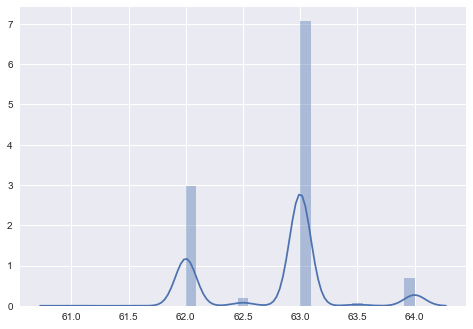

In [18]:
%matplotlib inline
import seaborn as sns

sns.distplot(bootsrap_sample_medians)

Based on our boostrap distribution we can now know that we are pretty confident that median age of billionaires right now is between 62 and 64.

## Next time

Next time we will take this one step further and do hypothesis tests and confidence intervals using the tools above. We will be able to say how confident we are that the estimate lies between.

## Learning Objectives

Today we apply bootstrapping to a real dataset, being very careful to elaborate on the assumptions we make in order to do so.

## Comprehension Questions

1.	What types of data have black swans in them?
2.	What types of data are hard to bootstrap?
3.	Before you bootstrap what do you need to do?
4.	Could we bootstrap age of female billionaires if we did not have information on gender? What about if we did?
5.	Answer some questions about the dataset:
    1.	Go ahead and find out what the 75 percentile of wealth is among billionaires?
    1.	Find out what the probability a billionaire inherited their wealth is?

